In [1]:
import tifffile
import os
import matplotlib.pyplot as plt
import random
import pandas as pd
import requests
from datetime import datetime

In [ ]:
metada = pd.read_csv("data/train_data/metadata.csv")
result = metada[metada["path"] == "images/plume/20230223_methane_mixing_ratio_id_6675"][
    ["coord_x", "coord_y"]
]
coord_x_value = result["coord_x"].iloc[0]
coord_y_value = result["coord_y"].iloc[0]

In [12]:
from methane import encode_positions
import numpy as np

In [19]:
im_path = "20230102_methane_mixing_ratio_id_4928.tif"
with tifffile.TiffFile("data/train_data/images/plume/" + im_path) as tif:
    # Access the image data
    image_data = tif.asarray()

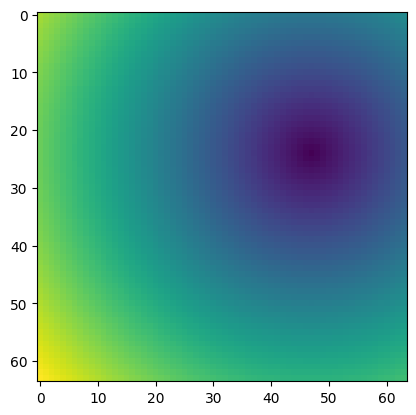

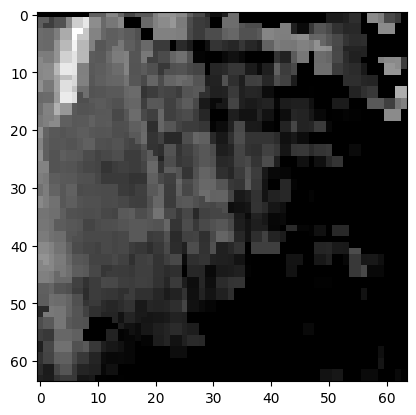

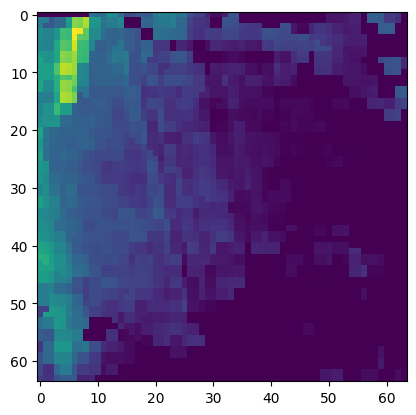

In [18]:
metada = pd.read_csv("data/train_data/metadata.csv")
result = metada[metada["path"] == "images/plume/20230223_methane_mixing_ratio_id_6675"][
    ["coord_x", "coord_y"]
]
coord_x_value = result["coord_x"].iloc[0]
coord_y_value = result["coord_y"].iloc[0]
positions = encode_positions(coord_x_value, coord_y_value)
plt.imshow(positions)
plt.show()
plt.imshow(image_data, cmap="gray")
plt.show()
plt.imshow(np.multiply(positions, image_data))

In [ ]:
data_dir = "data/train_data/images/plume/"
im_list = os.listdir(data_dir)
random_images = random.sample(im_list, 30)
metada = pd.read_csv("data/train_data/metadata.csv")

fig, axes = plt.subplots(3, 10, figsize=(12, 6))

for i, images in enumerate(random_images):
    # Open the TIFF image using tifffile
    with tifffile.TiffFile(data_dir + images) as tif:
        # Access the image data
        image_data = tif.asarray()

    desired_path = "images/plume/" + images

    result = metada[metada["path"] == desired_path[:-4]]
    coord_x_value = result["coord_x"].iloc[0]
    coord_y_value = result["coord_y"].iloc[0]
    longitude = result["lon"].iloc[0]
    latitude = result["lat"].iloc[0]
    date = result["date"].iloc[0]
    print(date)
    formatted_date = datetime.strptime(str(date), "%Y%m%d").strftime("%YYYY-%mm-%dd")
    url = (
        "https://api.open-meteo.com/v1/forecast?latitude="
        + str(latitude)
        + "&longitude="
        + str(longitude)
        + "&daily=windspeed_10m_max,winddirection_10m_dominant&timezone=Europe%2FLondon&start_date="
        + str(date)
        + "&end_date="+ str(date)"
    )
    response = requests.get(url)
    dico = response.json()
    print(dico)
    print(dico["daily"]["windspeed_10m_max"])
    # Plot the image in the appropriate subplot
    row = i // 10
    col = i % 10
    ax = axes[row, col]
    ax.imshow(image_data, cmap="gray")
    ax.scatter(coord_x_value, coord_y_value)
    ax.set_title(f"Image {i + 1}")
    ax.axis("off")

fig, axes = plt.subplots(3, 10, figsize=(12, 6))

for i, images in enumerate(random_images):
    # Open the TIFF image using tifffile
    with tifffile.TiffFile(data_dir + images) as tif:
        # Access the image data
        image_data = tif.asarray()

    # Plot the image in the appropriate subplot
    row = i // 10
    col = i % 10
    ax = axes[row, col]
    ax.hist(image_data.flatten(), bins=100)
    ax.set_title(f"Image {i + 1}")

In [ ]:
data_dir = "data/train_data/images/no_plume/"
im_list = os.listdir(data_dir)
random_images = random.sample(im_list, 30)
metada = pd.read_csv("data/train_data/metadata.csv")

fig, axes = plt.subplots(3, 10, figsize=(12, 6))

for i, images in enumerate(random_images):
    # Open the TIFF image using tifffile
    with tifffile.TiffFile(data_dir + images) as tif:
        # Access the image data
        image_data = tif.asarray()

    desired_path = "images/no_plume/" + images
    result = metada[metada["path"] == desired_path[:-4]][["coord_x", "coord_y"]]
    coord_x_value = result["coord_x"].iloc[0]
    coord_y_value = result["coord_y"].iloc[0]
    # Plot the image in the appropriate subplot
    row = i // 10
    col = i % 10
    ax = axes[row, col]
    ax.imshow(image_data, cmap="gray")
    ax.scatter(coord_x_value, coord_y_value)
    ax.set_title(f"Image {i + 1}")
    ax.axis("off")

fig, axes = plt.subplots(3, 10, figsize=(12, 6))

for i, images in enumerate(random_images):
    # Open the TIFF image using tifffile
    with tifffile.TiffFile(data_dir + images) as tif:
        # Access the image data
        image_data = tif.asarray()

    # Plot the image in the appropriate subplot
    row = i // 10
    col = i % 10
    ax = axes[row, col]
    ax.hist(image_data.flatten(), bins=100)
    ax.set_title(f"Image {i + 1}")

In [ ]:
import requests

In [ ]:
url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&daily=windspeed_10m_max,winddirection_10m_dominant&timezone=Europe%2FLondon&start_date=2023-08-05&end_date=2023-08-05"
response = requests.get(url)

In [ ]:
dico = response.json()

In [ ]:
dico["daily"]["windspeed_10m_max"]
dico["daily"]["winddirection_10m_dominant"]

In [ ]:
dico["daily"].keys()

In [ ]:
from datetime import datetime

# Input date string
date_string = "20230213"

# Convert to the desired format
formatted_date = datetime.strptime(date_string, "%Y%m%d").strftime("%Y-%m-%d")

print(str(formatted_date))